<a href="https://colab.research.google.com/github/Woongheelee7/Leon/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 

In [2]:
def error_rate(p: float):
    """Classification error rate for a given binary class ratio"""
    return p if p < 0.5 else 1 - p

def gini_index(p: float):
    """Gini index for a given binary class ratio."""
    return 2 * p * (1 - p)

def entropy(p: float):
    """Entropy for a given binary class ratio, normalized by ln(2)"""
    return -(p * np.log(p + 1e-16) + (1 - p) * np.log(1 - p + 1e-16)) / (np.log(2) / 0.5)



In [8]:
cancer = pd.read_csv("https://raw.githubusercontent.com/changyaochen/MECE4520/master/data/breast_cancer.csv")
cancer["label"] = cancer["diagnosis"].apply(lambda x: 0 if x == "B" else 1)
cancer_label=cancer["label"]
cancer_texture=cancer["texture_mean"]
cancer_sub=pd.concat([cancer_label,cancer_texture],axis=1)
cancer_sub_sorted=cancer_sub.sort_values(by='texture_mean')
cancer_sub_sorted

,label,texture_mean
166,0,9.71
0,1,10.38
313,0,10.72
120,0,10.82
123,0,10.89
...,...,...
265,1,31.12
219,1,32.47
259,1,33.56
232,0,33.81


In [4]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)
features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean",
    "concavity_mean",
    "concave_mean",
    "symmetry_mean",
    "fractal_mean",
    "radius_se",
    "texture_se",
    "perimeter_se",
    "area_se",
    "smoothness_se",
    "compactness_se",
    "concavity_se",
    "concave_se",
    "symmetry_se",
    "fractal_se",
    "radius_extreme",
    "texture_extreme",
    "perimeter_extreme",
    "area_extreme",
    "smoothness_extreme",
    "compactness_extreme",
    "concavity_extreme",
    "concave_extreme",
    "symmetry_extreme",
    "fractal_extreme",
]
label = "label"
dt_model.fit(X=cancer[features], y=cancer[label])

DecisionTreeClassifier(max_depth=3)

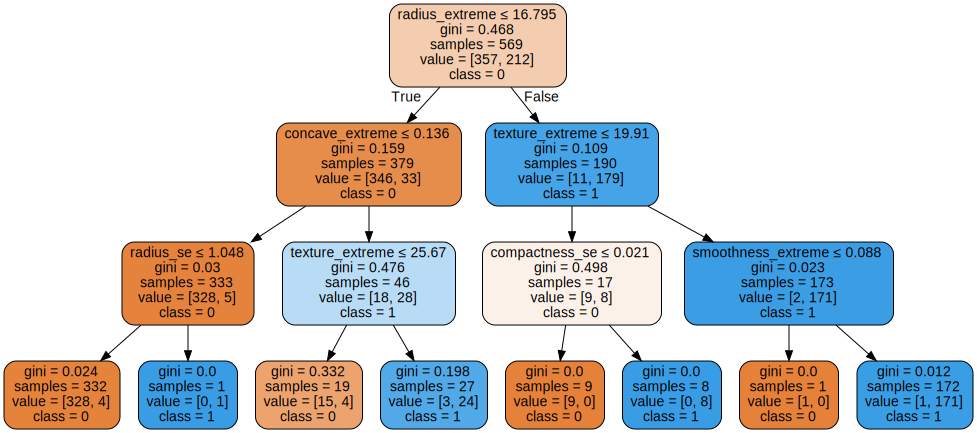

In [5]:
import graphviz

dot_data = tree.export_graphviz(
    decision_tree=dt_model, 
    out_file=None, 
    feature_names=features,  
    class_names=["0", "1"],  
    filled=True, 
    rounded=True,  
    special_characters=True,
    max_depth=3,
)  
graph = graphviz.Source(dot_data)  
graph.render("cancer_tree")
graph